In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv("../Rutuja/Downloads/Groceries_dataset.csv/Groceries_dataset.csv")

In [15]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [25]:
basket = (df.groupby(['Member_number', 'itemDescription'])  
          ['itemDescription']
          .count()
          .unstack()
          .fillna(0)
)
basket[basket>0] = 1



In [29]:
from mlxtend.frequent_patterns import apriori , association_rules
fr_itemsets = apriori(basket , min_support = 0.01, use_colnames = True)
rules = association_rules(fr_itemsets , metric = 'lift', min_threshold = 1)

C:\Users\Rutuja\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [31]:
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

,antecedents,consequents,support,confidence,lift
0,(UHT-milk),(beef),0.010518,0.133987,1.120775
1,(beef),(UHT-milk),0.010518,0.087983,1.120775
2,(bottled beer),(UHT-milk),0.014879,0.093700,1.193597
3,(UHT-milk),(bottled beer),0.014879,0.189542,1.193597
4,(bottled water),(UHT-milk),0.021293,0.099640,1.269268
5,(UHT-milk),(bottled water),0.021293,0.271242,1.269268
6,(UHT-milk),(brown bread),0.012314,0.156863,1.153681
7,(brown bread),(UHT-milk),0.012314,0.090566,1.153681
8,(butter),(UHT-milk),0.010518,0.083164,1.059394
9,(UHT-milk),(butter),0.010518,0.133987,1.059394


In [37]:
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
15189,"(yogurt, rolls/buns)","(other vegetables, sausage, whole milk)",0.111339,0.050282,0.013597,0.122120,2.428689,1.0,0.007998,1.081831,0.661957,0.091854,0.075641,0.196264
15180,"(other vegetables, sausage, whole milk)","(yogurt, rolls/buns)",0.050282,0.111339,0.013597,0.270408,2.428689,1.0,0.007998,1.218025,0.619400,0.091854,0.178999,0.196264
15182,"(yogurt, rolls/buns, other vegetables)","(sausage, whole milk)",0.052335,0.106978,0.013597,0.259804,2.428575,1.0,0.007998,1.206467,0.620721,0.093310,0.171133,0.193451
15187,"(sausage, whole milk)","(yogurt, rolls/buns, other vegetables)",0.106978,0.052335,0.013597,0.127098,2.428575,1.0,0.007998,1.085650,0.658702,0.093310,0.078893,0.193451
12797,"(yogurt, curd)","(sausage, whole milk)",0.040277,0.106978,0.010005,0.248408,2.322046,1.0,0.005696,1.188173,0.593239,0.072897,0.158372,0.170966
12800,"(sausage, whole milk)","(yogurt, curd)",0.106978,0.040277,0.010005,0.093525,2.322046,1.0,0.005696,1.058742,0.637549,0.072897,0.055483,0.170966
15193,"(yogurt, other vegetables)","(rolls/buns, sausage, whole milk)",0.120318,0.048743,0.013597,0.113006,2.318415,1.0,0.007732,1.072451,0.646451,0.087459,0.067556,0.195977
15176,"(rolls/buns, sausage, whole milk)","(yogurt, other vegetables)",0.048743,0.120318,0.013597,0.278947,2.318415,1.0,0.007732,1.219997,0.597810,0.087459,0.180326,0.195977
15190,"(rolls/buns, sausage)","(other vegetables, yogurt, whole milk)",0.082350,0.071832,0.013597,0.165109,2.298554,1.0,0.007681,1.111724,0.615642,0.096715,0.100496,0.177197
15179,"(other vegetables, yogurt, whole milk)","(rolls/buns, sausage)",0.071832,0.082350,0.013597,0.189286,2.298554,1.0,0.007681,1.131903,0.608665,0.096715,0.116532,0.177197


In [55]:
sc = StandardScaler()
x_scaled = sc.fit_transform(basket)
kmeans = KMeans(n_clusters = 5, random_state=42)
basket['cluster'] = kmeans.fit_predict(x_scaled)

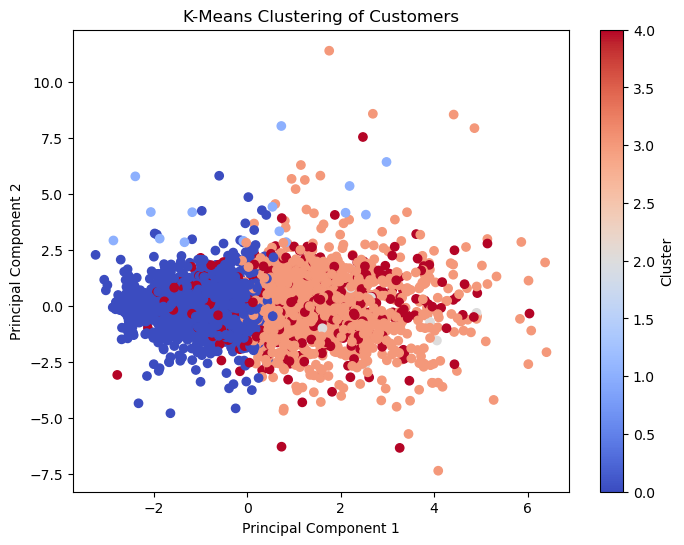

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            c=basket['cluster'], cmap='coolwarm')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
